<a href="https://colab.research.google.com/github/epb378/FRET-simulator/blob/master/fretsimulator3-functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded=files.upload()

Saving green extinction coefficient.csv to green extinction coefficient.csv
Saving red extinction coefficient.csv to red extinction coefficient.csv
Saving blue extinction coefficient.csv to blue extinction coefficient.csv
Saving bluemolem.csv to bluemolem.csv
Saving greenmolem.csv to greenmolem.csv
Saving redmolem.csv to redmolem.csv


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


(array([[3.36257310e-04, 5.93567251e-04, 1.23976608e-03, 1.57894737e-03,
         1.97660819e-03, 2.64035088e-03, 2.40643275e-03, 2.71052632e-03,
         2.19005848e-03, 2.23976608e-03, 2.36549708e-03, 2.29824561e-03,
         2.20760234e-03, 1.67836257e-03, 1.12865497e-03, 7.39766082e-04,
         3.97660819e-04, 2.42690058e-04, 9.35672515e-05, 6.14035088e-05,
         4.38596491e-05, 2.33918129e-05, 1.46198830e-05, 1.75438596e-05,
         2.92397661e-06, 8.77192982e-06, 2.92397661e-06, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [3.36257310e-04, 5.93567251e-04, 1.23976608e-03, 1.57894737e-03,
         1.97660819e-03, 2.64035088e-03, 2.40643275e-03, 2.71052632e-03,
         2.19005848e-03, 2.23976608e-03, 2.36549708e-03, 2.29824561e-03,
         2.20760234e-03, 1.77777778e-03, 2.08771930e-03, 5.54970760e-03,
         6.26023392e-03, 3.61403509e-03, 2.74561404e-03, 3.8479532

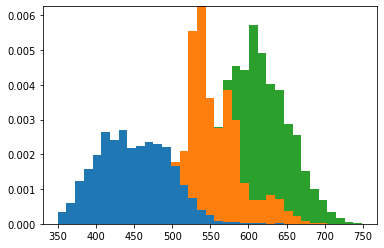

In [3]:

import scipy
import numpy as np
from scipy import stats
reddata=np.loadtxt('redmolem.csv',delimiter=',')
redwavelength=reddata[:,0]
greendata=np.loadtxt('greenmolem.csv',delimiter=',')
greenwavelength=greendata[:,0]
bluedata=np.loadtxt('bluemolem.csv',delimiter=',')
bluewavelength=bluedata[:,0]
redprob=reddata[:,1]
greenprob=greendata[:,1]
blueprob=bluedata[:,1]
redcustm = stats.rv_discrete(name='redcustm', values=(redwavelength, redprob))
greencustm = stats.rv_discrete(name='greencustm', values=(greenwavelength, greenprob))
bluecustm = stats.rv_discrete(name='bluecustm', values=(bluewavelength, blueprob))
import matplotlib.pyplot as plt
import seaborn as sns
x=np.zeros((10000,3))
x[:,0]=bluecustm.rvs(size=10000)
x[:,1]=greencustm.rvs(size=10000)
x[:,2]=redcustm.rvs(size=10000)
colors = ['blue', 'green', 'red']

plt.hist(x, 35, density=True, histtype='bar', stacked=True) #plot randomly sampled wavelngths from emission distribution
#print(custm.rvs(size=100))

In [0]:
moltomolecule=1 #ratio of molar extinction coefficient to molecular
redabs=np.loadtxt('red extinction coefficient.csv',delimiter=',')
greenabs=np.loadtxt('green extinction coefficient.csv',delimiter=',')
blueabs=np.loadtxt('blue extinction coefficient.csv',delimiter=',')

def combinedexctinction (redabs,greenabs,blueabs,Nr,Ng,Nb): 
  redwave=redabs[:,0]
  greenwave=greenabs[:,0]
  bluewave=blueabs[:,0]
  redexct=redabs[:,1]
  greenexct=greenabs[:,1]
  blueexct=blueabs[:,1]
  #the below is for 300-700 nm exctinction coefficiencts with a nm step of 1 - could try variable length later...
  combined=np.zeros([redwave.size,5])
  combined[:,0]=redwave
  combined[:,1]=Nb*blueexct*moltomolecule
  combined[:,2]=Ng*greenexct*moltomolecule
  combined[:,3]=Nr*redexct*moltomolecule
  combined[:,4]=combined[:,1]+combined[:,2]+combined[:,3]
  return combined
#totalextinction=combinedexctinction(redabs,greenabs,blueabs,2,20,20)

In [0]:
def populategrid(molecules,distances,Nr,Ng,Nb, Xmax, Ymax, Zmax,Ri):
  from random import randint

  Ntot=Ng+Nr+Nb
  
  for i in range (0,Ntot):
    
    molecules[i,1]=randint(1,Xmax)
    molecules[i,2]=randint(1,Ymax)
    molecules[i,3]=randint(1,Zmax)
    if i>0:
        for j in range(0,i):
            distances[i,j]=np.sqrt((molecules[i,1]-molecules[j,1])**2 + (molecules[i,2]-molecules[j,2])**2 + (molecules[i,3]-molecules[j,3])**2)
            distances[j,i]=distances[i,j]
            if distances[i,j]<(Ri[int(molecules[i,0]-1)]+Ri[int(molecules[j,0]-1)]):
                i = i-1
  return molecules,distances

In [0]:

def exciterandommol(wavelength,molecules,combined,Nr,Ng,Nb, printing=False):
  findblues=np.where(molecules[:,0]==1) #excite random blue
  findgreens=np.where(molecules[:,0]==2) #excite random blue
  findreds=np.where(molecules[:,0]==3) #excite random blue
  findwavelength=np.where(combined[:,0]==wavelength)
  bluesarray=findblues[0]
  greensarray=findgreens[0]
  redsarray=findreds[0]
  Pred=combined[findwavelength[0],3]/combined[findwavelength[0],4]
  Pgreen=Pred+combined[findwavelength[0],2]/combined[findwavelength[0],4]
  dice=np.random.random()
  if dice<Pred:
    excitint=random.randint(0,Nr-1)
    excitindex=redsarray[excitint]    
  elif dice<Pgreen:
    excitint=random.randint(0,Ng-1)
    excitindex=greensarray[excitint]    
  elif dice<1:
    excitint=random.randint(0,Nb-1)
    excitindex=bluesarray[excitint]    
  if printing==True:
    print("start molecule is number ")
    print( excitindex)
  molecules[:,4]=0
  molecules[excitindex,4]=1
  return molecules, excitindex
#exciterandomblue(molecules,Nb)

In [0]:
def FRETTING(distances,excitindex,Ntot,molecules,Ros,PLQEs,closest,somethinghappened, outspectrum,redcustm,greencustm,bluecustm,color,i):
    zeroNtot=np.arange(Ntot)
    zeroNtot.shape=(Ntot,1)
    while somethinghappened == 0:
        a=distances[:,excitindex] #find distances to closest molecules
        a.shape=(Ntot,1)
        indexeddistances= np.concatenate((zeroNtot,a), axis=1)
        indexeddistances= indexeddistances[indexeddistances[:,1].argsort()] #find index of closest molecule
        if molecules[int(indexeddistances[closest,0]),0] > molecules[excitindex,0]:
            dice=np.random.random()
            Pfret=1/(1+(indexeddistances[closest,1]/Ros[int(molecules[excitindex,0]-1),int(molecules[int(indexeddistances[closest,0]),0]-1)])**6) #fret probability
            
            Pem=Pfret + (1-Pfret)*PLQEs[int(molecules[excitindex,0]-1)]
            
            if dice<=Pfret:
                molecules[excitindex,4]=0
                molecules[int(indexeddistances[closest,0]),4]=1
                excitindex=int(indexeddistances[closest,0])
                somethinghappened=0
            elif Pfret< dice <= Pem:
                if color==3:
                  outspectrum[i]=redcustm.rvs()
                elif color==2:
                  outspectrum[i]=greencustm.rvs()
                else:
                  outspectrum[i]=bluecustm.rvs()
                somethinghappened=1
            else:
                #print("non-radiative recombination, bozo")
                somethinghappened=1
        else:
            closest= closest+1
            if closest==Ntot:
              break
    return excitindex, molecules, closest, outspectrum

In [0]:
def exciterandomblue (molecules,Nb, printing=False):
  findblues=np.where(molecules[:,0]==1) #excite random blue
  bluesarray=findblues[0]
  excitint=random.randint(0,Nb-1)
  excitindex=bluesarray[excitint]
  if printing==True:
    print("start molecule is number ")
    print( excitindex)
  molecules[:,4]=0
  molecules[excitindex,4]=1
  return molecules, excitindex
#exciterandomblue(molecules,Nb)

In [0]:
import matplotlib.pyplot as plt
import math
import random
def FRETsimulator(x):
  density=x[0]   #molecules/nm3
  greentored=x[1] #ratio of green molecules to red molecules
  bluetored=x[2] #ratio of blue molecules to red molecules
  Ntot=100
  Nr=int(Ntot/(greentored+bluetored+1))
  Nb=int(bluetored*Nr)
  Ng=int(greentored*Nr)
  blues=np.ones([Nb,1])
  greens=np.ones([Ng,1])
  greens=greens*2
  reds=np.ones([Nr,1])
  reds=reds*3 
  Ntot=Nb+Ng+Nr #might not quite be able to equal 100, rather get the ratio right than the number right

  ###spatial units are nm###NB perylene density =1.3g/cm3. molar mass=252.3g/mol => 3e21 cm-3 =3nm-3
  Ri=np.array([[2],[2.4],[3.25]])
  xyz=int(Ntot/density)
  Xmax, Ymax, Zmax = xyz, xyz, xyz
  ###nm resolution grid###
  Ros=np.array([[4,4.5,4.8],[0.01,4,8.9],[0.01,0.01,4]])
  PLQEs=np.array([0.2,0.9,0.99])

  molecules=np.concatenate((reds,greens,blues))
  #print(molecules)
  np.random.shuffle(molecules)
  rest=np.zeros([Ntot,4])
  molecules=np.concatenate((molecules,rest), axis=1)
  distances=np.zeros([Ntot,Ntot])
  molecules, distances=populategrid(molecules,distances,Nr,Ng,Nb, Xmax, Ymax, Zmax,Ri)
        
  ticks=10000
  outspectrum=np.zeros([ticks])
  findblues=np.where(molecules[:,0]==1)
  bluesarray=findblues[0]
  excitint=random.randint(0,Nb-1)
  excitindex=bluesarray[excitint]
  molecules[:,4]=0
  molecules[excitindex,4]=1
  combinedabs=combinedexctinction(redabs,greenabs,blueabs,Nr,Ng,Nb)
  wavelength=500
  for i in range (0,ticks):
  #    print(i)
      molecules,excitindex=exciterandommol(wavelength,molecules,combinedabs,Nr,Ng,Nb, printing=False)
      color=molecules[excitindex,0]
      somethinghappened=0
      closest=1
      excitindex, molecules, closest, outspectrum = FRETTING(distances,excitindex,Ntot,molecules,Ros,PLQEs,closest,somethinghappened, outspectrum,redcustm,greencustm,bluecustm,color,i)
    
  plt.hist(outspectrum, color = 'yellow', edgecolor = 'black',
          bins = int((700-350)/10)) 
  outnonzero=np.count_nonzero(outspectrum)

  outPLQE=outnonzero/(i)
  return outPLQE

PLQE=
0.7715771577157716


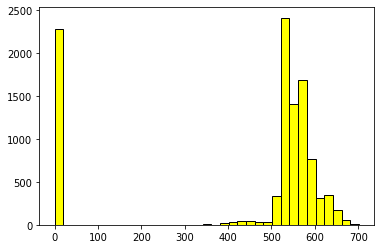

In [0]:
from mpl_toolkits.mplot3d import Axes3D #(3D scatter https://matplotlib.org/3.1.1/gallery/mplot3d/scatter3d.html)
#import numpy as np
import matplotlib.pyplot as plt
import math
import random
#set up grid of Xmax*Ymax*Zmax points

#populate grid with Nb blue molecules, Ng greens, and Nr reds
Nb = 20
blues=np.ones([Nb,1])
gtb=1
Ng = Nb*gtb
greens=np.ones([Ng,1])
greens=greens*2
rtg=0.1
Nr = math.floor(Ng*rtg)
reds=np.ones([Nr,1])
reds=reds*3 
Ntot=Nb+Ng+Nr

###spatial units are nm###NB perylene density =1.3g/cm3. molar mass=252.3g/mol => 3e21 cm-3 =3nm-3
Ri=np.array([[2],[2.4],[3.25]])
dyenumberdensity=0.01 #molecules/nm3
xyz=int(Ntot/dyenumberdensity)
Xmax, Ymax, Zmax = xyz, xyz, xyz
###nm resolution grid###
Ros=np.array([[4,4.5,4.8],[0.01,4,8.9],[0.01,0.01,4]])
PLQEs=np.array([0.2,0.9,0.99])

molecules=np.concatenate((reds,greens,blues))
#print(molecules)
np.random.shuffle(molecules)
rest=np.zeros([Ntot,4])
molecules=np.concatenate((molecules,rest), axis=1)
distances=np.zeros([Ntot,Ntot])
molecules, distances=populategrid(molecules,distances,Nr,Ng,Nb, Xmax, Ymax, Zmax,Ri)
       
ticks=10000
outspectrum=np.zeros([ticks])
findblues=np.where(molecules[:,0]==1)
bluesarray=findblues[0]
excitint=random.randint(0,Nb-1)
excitindex=bluesarray[excitint]
molecules[:,4]=0
molecules[excitindex,4]=1
combinedabs=combinedexctinction(redabs,greenabs,blueabs,Nr,Ng,Nb)
wavelength=500
for i in range (0,ticks):
#    print(i)
    molecules,excitindex=exciterandommol(wavelength,molecules,combinedabs,Nr,Ng,Nb, printing=False)
    color=molecules[excitindex,0]
    somethinghappened=0
    closest=1
    excitindex, molecules, closest, outspectrum = FRETTING(distances,excitindex,Ntot,molecules,Ros,PLQEs,closest,somethinghappened, outspectrum,redcustm,greencustm,bluecustm)
   
plt.hist(outspectrum, color = 'yellow', edgecolor = 'black',
         bins = int((700-350)/10)) 
outnonzero=np.count_nonzero(outspectrum)

outPLQE=outnonzero/(i)
print('PLQE=')
print(outPLQE)

0.7524752475247525


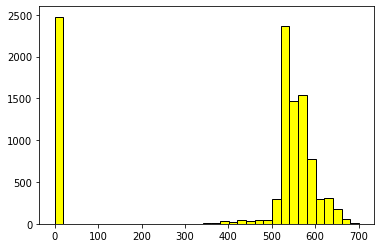

In [21]:
x=np.array([1,10,10])
print(FRETsimulator(x))